In [1]:
import wget
url = 'https://raw.githubusercontent.com/adel1726/laba1/refs/heads/main/machine.data'
filename = wget.download(url)
print(filename)

100% [................................................................................] 9876 / 9876machine (2).data


In [3]:
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

data_source = 'machine.data'
d = pd.read_table(data_source, delimiter=',',
                  header=None,
                  names=['buying','maint','doors','persons','lug_boot','safety','class'])
dX = d.iloc[ : , 0:13 ]
dy = d['maint']
print(dX.head())
print(dy.head())

                     buying  maint  doors  persons  lug_boot  safety  class
adviser 32/60   125     256   6000    256       16       128     198    199
amdahl  470v/7  29     8000  32000     32        8        32     269    253
        470v/7a 29     8000  32000     32        8        32     220    253
        470v/7b 29     8000  32000     32        8        32     172    253
        470v/7c 29     8000  16000     32        8        16     132    132
adviser  32/60    125     6000
amdahl   470v/7   29     32000
         470v/7a  29     32000
         470v/7b  29     32000
         470v/7c  29     16000
Name: maint, dtype: int64


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = \
train_test_split(dX, dy, test_size=0.3, random_state=12)

tree = DecisionTreeClassifier(max_depth=13,
                              random_state=21,
                              max_features=2)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.6349206349206349


C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_sp

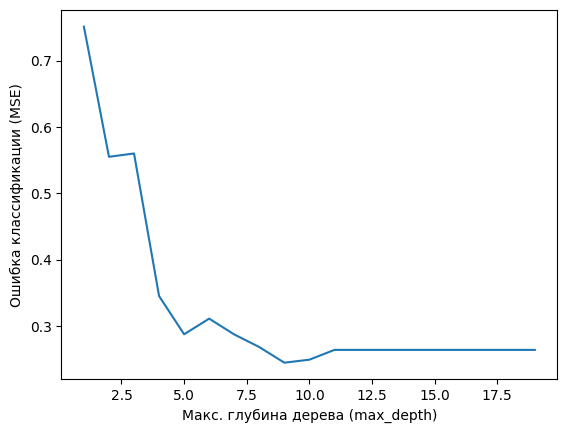

Оптимальные значения max_depth:  [9]


In [5]:
from sklearn.model_selection import cross_val_score

d_list = list(range(1,20))
cv_scores = []
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d,
                                  random_state=8,
                                  max_features=2)
    scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1-x for x in cv_scores]

plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

d_min = min(MSE)

all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

print('Оптимальные значения max_depth: ', all_d_min)

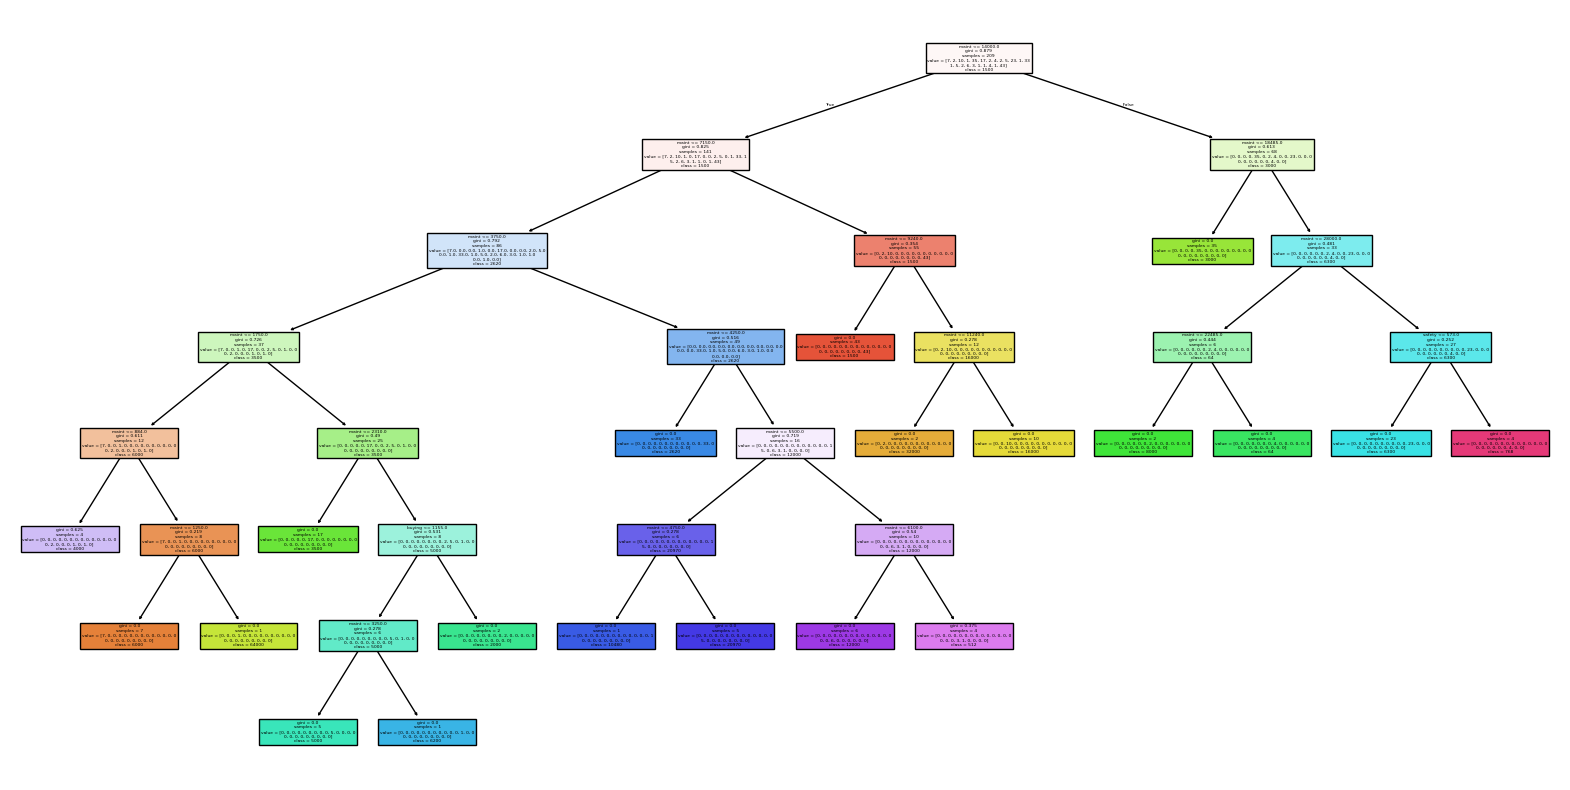

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_grid.best_estimator_, 
          feature_names=dX.columns,
          class_names=[str(x) for x in dy.unique()],
          filled=True)
plt.show()

Оптимальное дерево решений


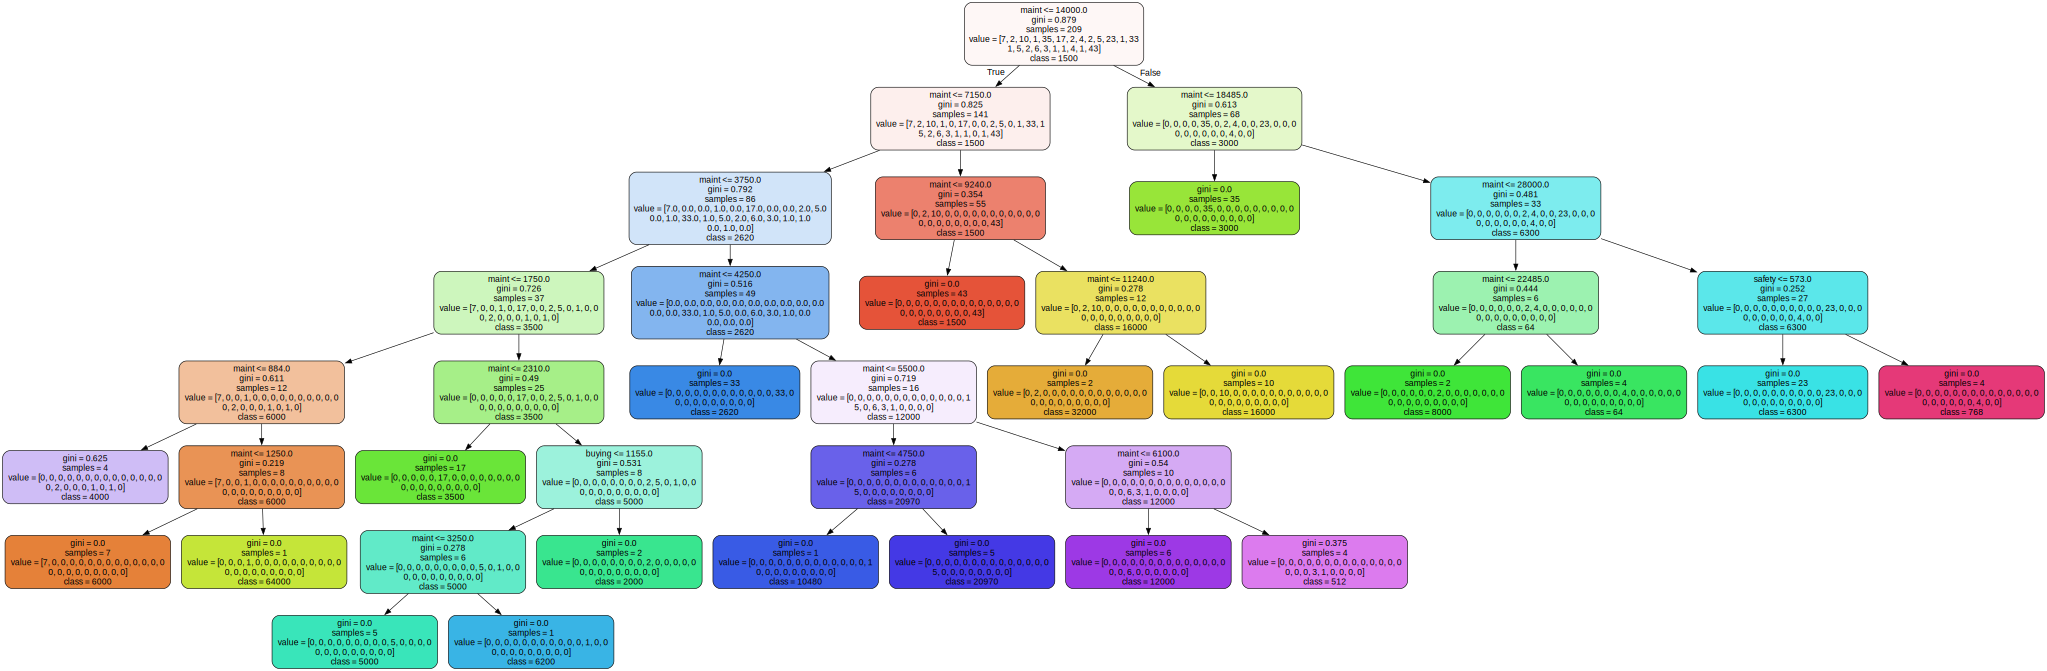

In [14]:
dtc = DecisionTreeClassifier(max_depth=13,
                             random_state=21,
                             max_features=1)
dtc.fit(dX.values, dy)
res = dtc.predict([[1955,167,524,2000,15,19,23,]])
print(res)

['16000']


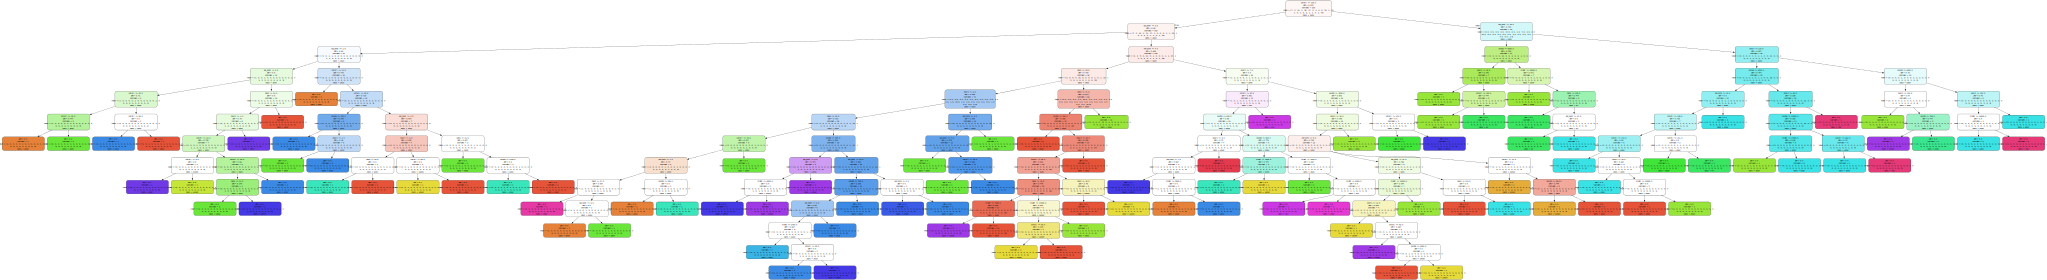

In [15]:
dot_data = tree.export_graphviz(dtc,
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file=None,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [16]:
print(sorted(list(plt.colormaps)))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cr

In [17]:
dy = dy.apply(lambda x: x.strip() if isinstance(x, str) else x)
print(dy.unique())

['6000' '32000' '16000' '64000' '3000' '3500' '8000' '64' '2000' '5000'
 '6300' '6200' '2620' '10480' '20970' '4000' '12000' '512' '1000' '4500'
 '768' '24000' '1500']


Обнаружено классов: 23


C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\skl

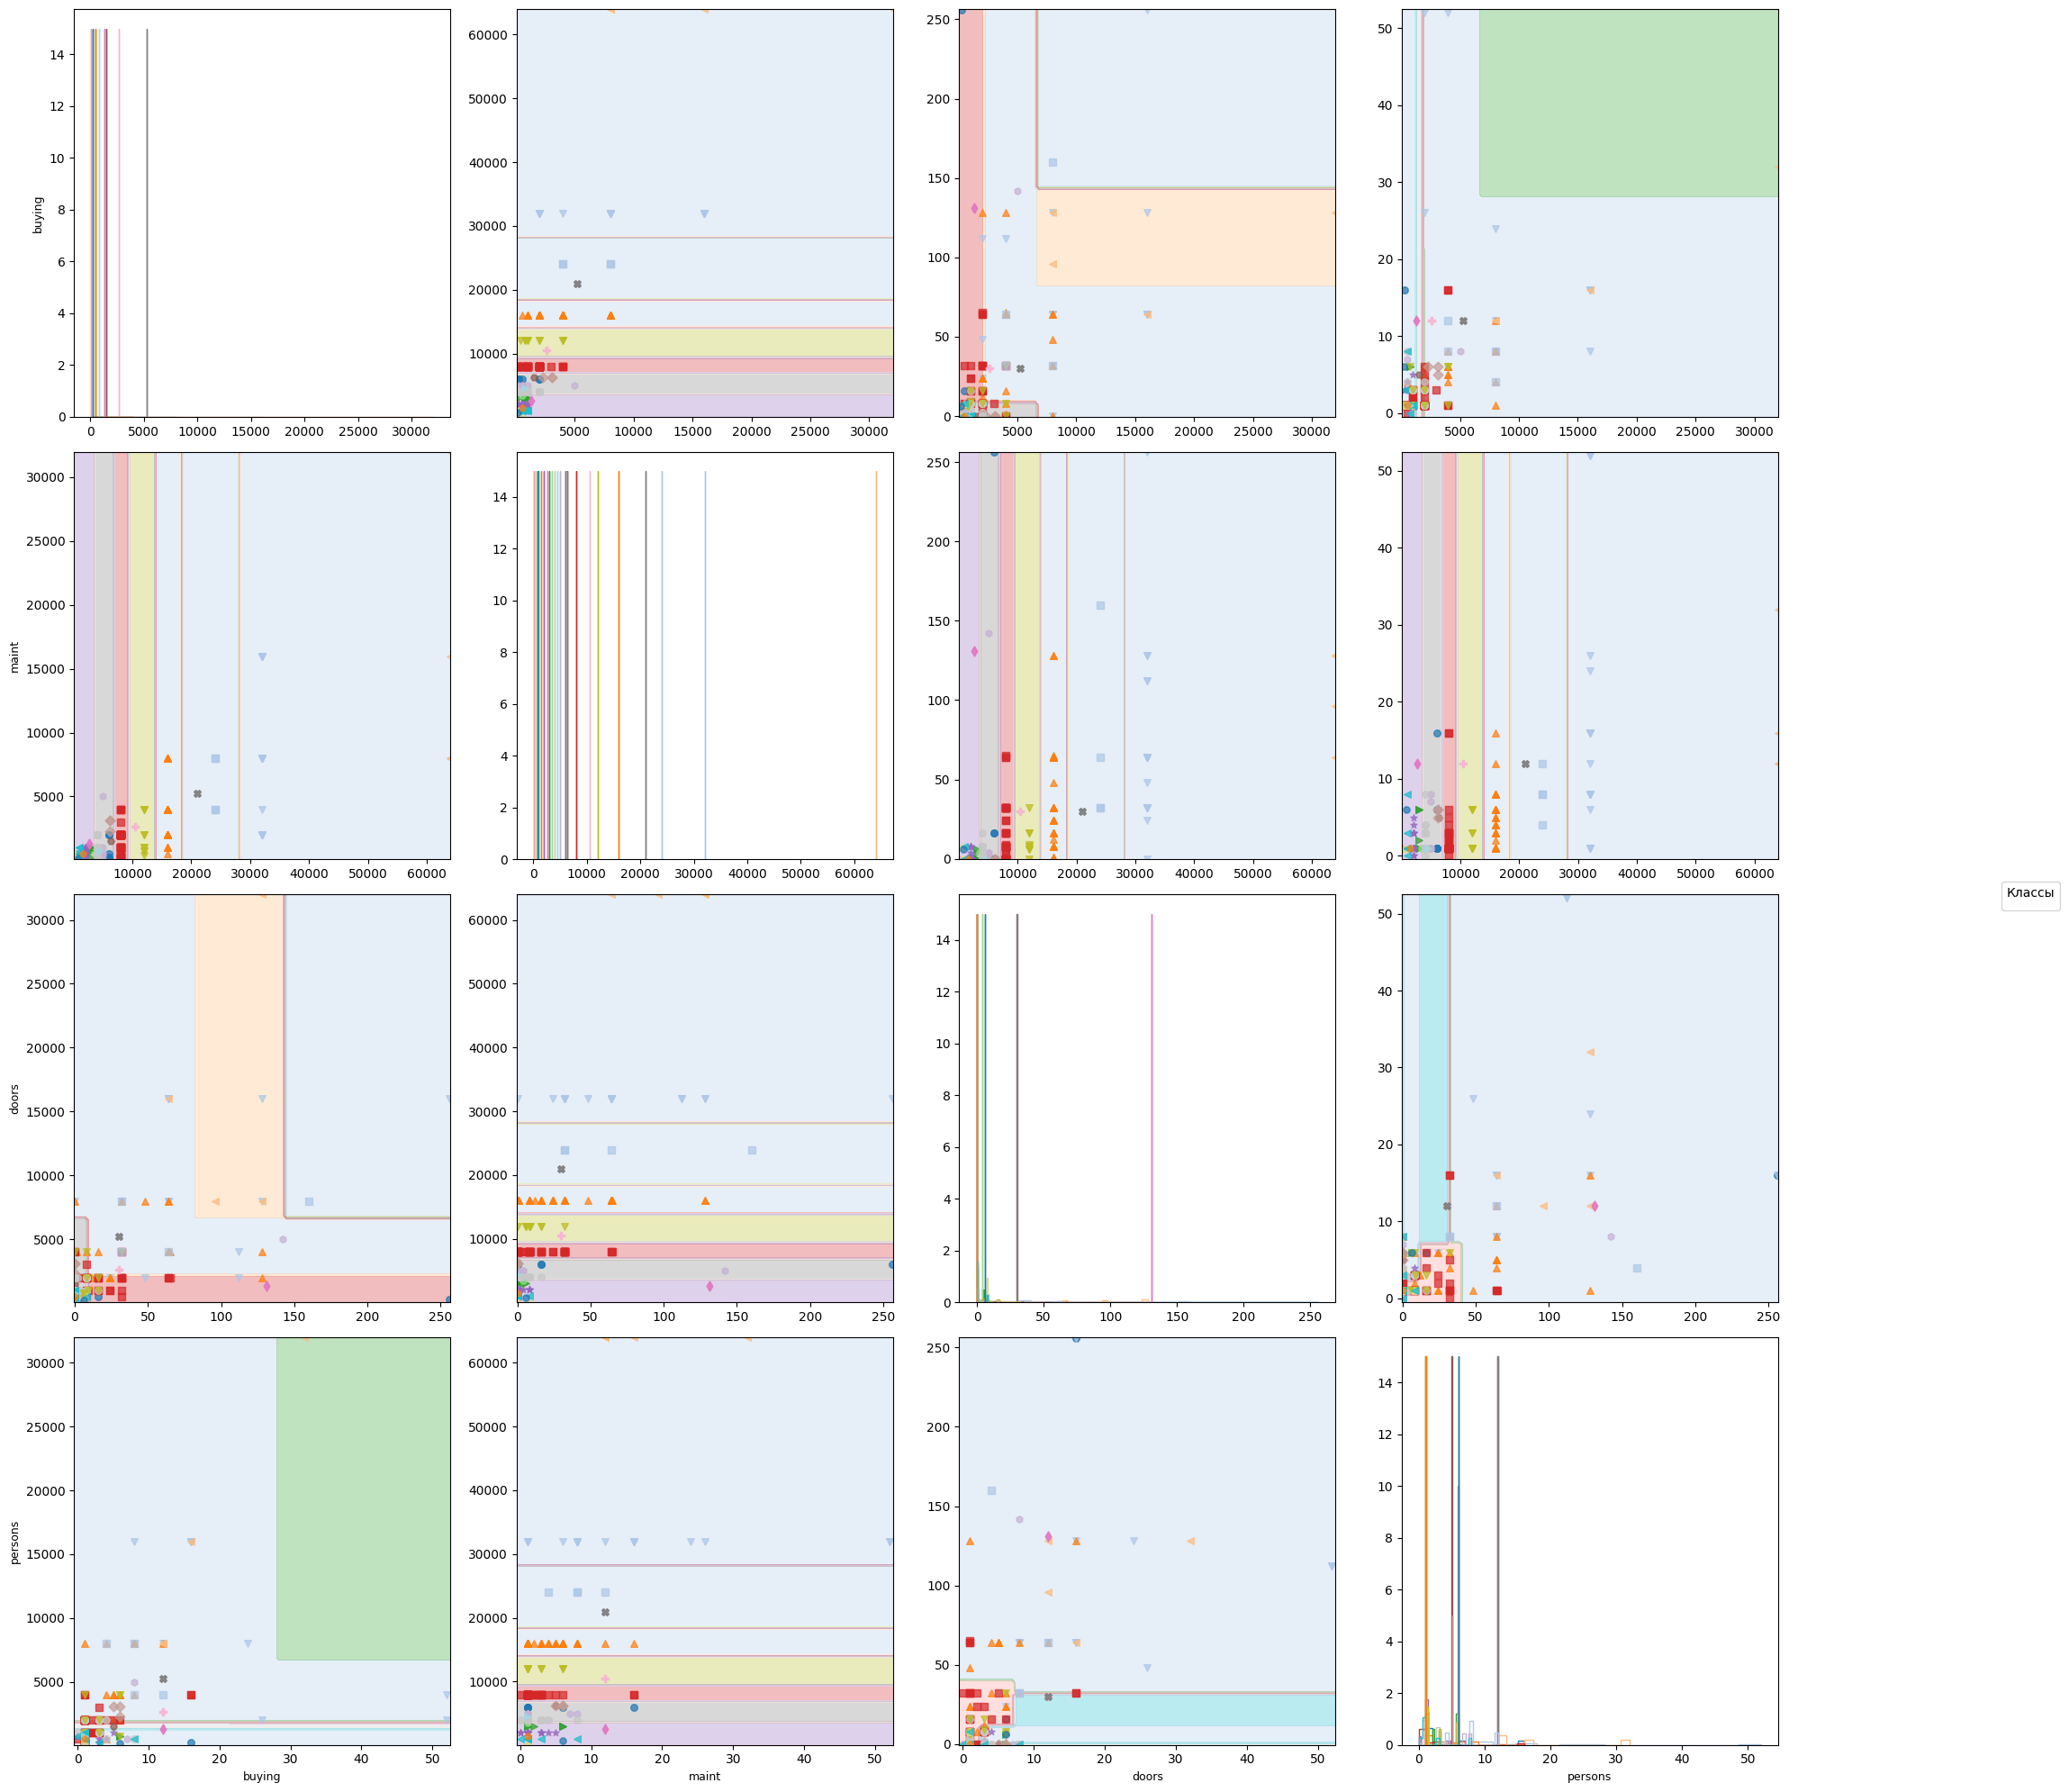

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Получаем уникальные классы
answers = dy.unique()
n_classes = len(answers)
print(f"Обнаружено классов: {n_classes}")

# Автоматически генерируем достаточное количество маркеров и цветов
plot_markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
colors = plt.cm.tab20.colors  # Используем цветовую карту с 20 цветами

# Если классов больше, чем доступных маркеров - циклически повторяем
if n_classes > len(plot_markers):
    plot_markers = plot_markers * (n_classes // len(plot_markers) + 1)
if n_classes > len(colors):
    colors = colors * (n_classes // len(colors) + 1)

# Создаем subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Вычисляем границы
fmin = dX.min().values - 0.5
fmax = dX.max().values + 0.5
plot_step = 0.05  # Увеличили шаг для производительности

# Создаем цветовую карту для областей решений
cmap = ListedColormap(colors[:n_classes])

for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        
        # Для недиагональных графиков
        if i != j:
            try:
                # Оптимизированное создание сетки
                x_values = np.linspace(fmin[i], fmax[i], 100)
                y_values = np.linspace(fmin[j], fmax[j], 100)
                xx, yy = np.meshgrid(x_values, y_values)
                
                # Обучаем упрощенную модель для визуализации
                model = DecisionTreeClassifier(max_depth=3, random_state=21)
                model.fit(dX.iloc[:, [i,j]], dy)
                
                # Предсказание и преобразование меток
                p = model.predict(np.c_[xx.ravel(), yy.ravel()])
                p = p.reshape(xx.shape)
                
                # Числовые метки для contourf
                label_to_num = {label: idx for idx, label in enumerate(answers)}
                p_num = np.vectorize(label_to_num.get)(p)
                
                # Визуализация областей решений
                ax.contourf(xx, yy, p_num, cmap=cmap, alpha=0.3)
                
            except Exception as e:
                print(f"Ошибка для признаков {i}-{j}: {str(e)}")
                continue
        
        # Визуализация точек данных
        for class_idx, answer in enumerate(answers):
            mask = (dy == answer)
            if i == j:
                # Гистограмма на диагонали
                ax.hist(dX.loc[mask, dX.columns[i]], 
                       bins=15,
                       color=colors[class_idx],
                       histtype='step',
                       density=True)
            else:
                # Точечный график
                ax.scatter(dX.loc[mask, dX.columns[i]],
                          dX.loc[mask, dX.columns[j]],
                          marker=plot_markers[class_idx],
                          color=colors[class_idx],
                          s=30,
                          alpha=0.7,
                          label=str(answer))
        
        # Настройка осей
        if j == 0:
            ax.set_ylabel(dX.columns[i], fontsize=9)
        if i == 3:
            ax.set_xlabel(dX.columns[j], fontsize=9)

# Создаем общую легенду
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='center right', 
           bbox_to_anchor=(1.15, 0.5),
           title="Классы")

plt.tight_layout()
plt.show()